In [22]:
# Dependencies
import pandas as pd
import numpy as np
from pathlib import Path

# visualizations
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns

#linregress
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

In [23]:
file_one = Path("../projects/project-1-group17/global-data.csv")
raw_df = pd.read_csv(file_one, encoding="UTF-8")
raw_df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Singapore,2000,100.0,100.0,37.95,NaN,0.33,29.00,0.0,0.0,...,109289.080,3.46,42120.00000,0.176538,9.039147,23852.32703,"8,358",716.0,1.352083,103.819836
1,Singapore,2001,100.0,100.0,37.50,NaN,0.60,32.05,0.0,0.0,...,121494.555,3.99,42030.00000,0.300129,-1.069016,21700.02005,"8,358",716.0,1.352083,103.819836
2,Singapore,2002,100.0,100.0,37.25,NaN,0.58,33.53,0.0,0.0,...,115456.870,3.81,41290.00092,0.305507,3.914610,22159.68886,"8,358",716.0,1.352083,103.819836
3,Singapore,2003,100.0,100.0,37.03,NaN,0.58,34.21,0.0,0.0,...,107484.375,4.41,38159.99985,0.338367,4.535780,23730.15245,"8,358",716.0,1.352083,103.819836
4,Singapore,2004,100.0,100.0,36.60,NaN,0.53,35.56,0.0,0.0,...,119262.510,4.82,39619.99893,0.292528,9.819592,27608.53737,"8,358",716.0,1.352083,103.819836


In [24]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [25]:
# drop Renewables (% equivalent primary energy) 
# Financial flows to developing countries (US $) null/zero values assumed to be zero 
# repleaced nulls with zeros on Renewable-electricity-generating-capacity-per-capita
# Dropping Density (density\n(P/Km2) over concerns of accuracy and relevance 
new_data_df = raw_df.drop(columns=["Renewables (% equivalent primary energy)"])
new_data_df.info()
#Questions for Prof/TA
# Do we need the data to have the same number of data points? 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 20 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [26]:
# drop Renewables (% equivalent primary energy) 
new_data_df = raw_df.drop(columns=["Renewables (% equivalent primary energy)"])
new_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 20 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [27]:
# Financial flows to developing countries (US $) null/zero values assumed to be zero 
mask = pd.isna(new_data_df["Financial flows to developing countries (US $)"])
new_data_df.loc[mask, "Financial flows to developing countries (US $)"] = 0

new_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 20 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    3649 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [28]:
mask = pd.isna(new_data_df["Renewable-electricity-generating-capacity-per-capita"])
new_data_df.loc[mask, "Renewable-electricity-generating-capacity-per-capita"] = 0

print(new_data_df['Renewable-electricity-generating-capacity-per-capita'].tail())

3644     57.78
3645     79.31
3646     85.64
3647     84.37
3648    702.29
Name: Renewable-electricity-generating-capacity-per-capita, dtype: float64


In [29]:
# Dropping Density (density\n(P/Km2) over concerns of accuracy and relevance 
new_data_df.drop(new_data_df.columns[16], axis=1, inplace=True)

new_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 19 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              3649 non-null   float64
 5   Financial flows to developing countries (US $)                    3649 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [30]:
new_data_df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
0,Singapore,2000,100.0,100.0,37.95,0.0,0.33,29.00,0.0,0.0,0.0,109289.080,3.46,42120.00000,9.039147,23852.32703,716.0,1.352083,103.819836
1,Singapore,2001,100.0,100.0,37.50,0.0,0.60,32.05,0.0,0.0,0.0,121494.555,3.99,42030.00000,-1.069016,21700.02005,716.0,1.352083,103.819836
2,Singapore,2002,100.0,100.0,37.25,0.0,0.58,33.53,0.0,0.0,0.0,115456.870,3.81,41290.00092,3.914610,22159.68886,716.0,1.352083,103.819836
3,Singapore,2003,100.0,100.0,37.03,0.0,0.58,34.21,0.0,0.0,0.0,107484.375,4.41,38159.99985,4.535780,23730.15245,716.0,1.352083,103.819836
4,Singapore,2004,100.0,100.0,36.60,0.0,0.53,35.56,0.0,0.0,0.0,119262.510,4.82,39619.99893,9.819592,27608.53737,716.0,1.352083,103.819836


In [31]:
new_data_df['Financial flows to developing countries (US $)'].mean()

40282115.64812277

In [32]:
new_data_df['Renewable energy share in the total final energy consumption (%)'].mean()

32.63816497829234

In [33]:
averages = new_data_df.groupby('Year')['Financial flows to developing countries (US $)'].mean()
print(averages)

Year
2000    7.582948e+06
2001    7.032093e+06
2002    7.199419e+06
2003    1.782547e+07
2004    8.778779e+06
2005    1.090936e+07
2006    1.162634e+07
2007    2.264598e+07
2008    1.265402e+07
2009    3.932414e+07
2010    5.056822e+07
2011    4.581908e+07
2012    5.561172e+07
2013    6.637229e+07
2014    8.113034e+07
2015    6.796051e+07
2016    9.101537e+07
2017    1.149942e+08
2018    7.193994e+07
2019    5.141731e+07
2020    1.714286e+02
Name: Financial flows to developing countries (US $), dtype: float64


In [34]:
averages = new_data_df.groupby('Year')['Renewable energy share in the total final energy consumption (%)'].mean()
print(averages)

Year
2000    34.489070
2001    34.090819
2002    33.999532
2003    33.633450
2004    33.458187
2005    33.381053
2006    33.078129
2007    32.491329
2008    32.580289
2009    32.681792
2010    32.476532
2011    32.161792
2012    32.081503
2013    32.301552
2014    32.073678
2015    31.809310
2016    31.590805
2017    31.433391
2018    31.487356
2019    31.294310
2020    81.900000
Name: Renewable energy share in the total final energy consumption (%), dtype: float64


In [78]:
data_2020_cleaned = new_data_df.dropna(subset=["Financial flows to developing countries (US $)", "Renewable energy share in the total final energy consumption (%)"])

# Calculate the average financial flows for each entity
averages = data_2020_cleaned.groupby('Entity')['Financial flows to developing countries (US $)'].mean()

# Sort the entities based on the average financial flows in descending order
averages_sorted = averages.sort_values(ascending=False)

# Select the top 10 entities with the highest average financial flows
top_10_entities_ff = averages_sorted.head(10)

# Display the top 10 entities with their average financial flows
print(top_10_entities_ff)

Entity
India        682033000.0
Pakistan     469046500.0
Nigeria      381888000.0
Ethiopia     354049000.0
Turkey       342547500.0
Indonesia    289244500.0
Morocco      274260500.0
Egypt        262516500.0
Argentina    239297500.0
Chile        229163000.0
Name: Financial flows to developing countries (US $), dtype: float64


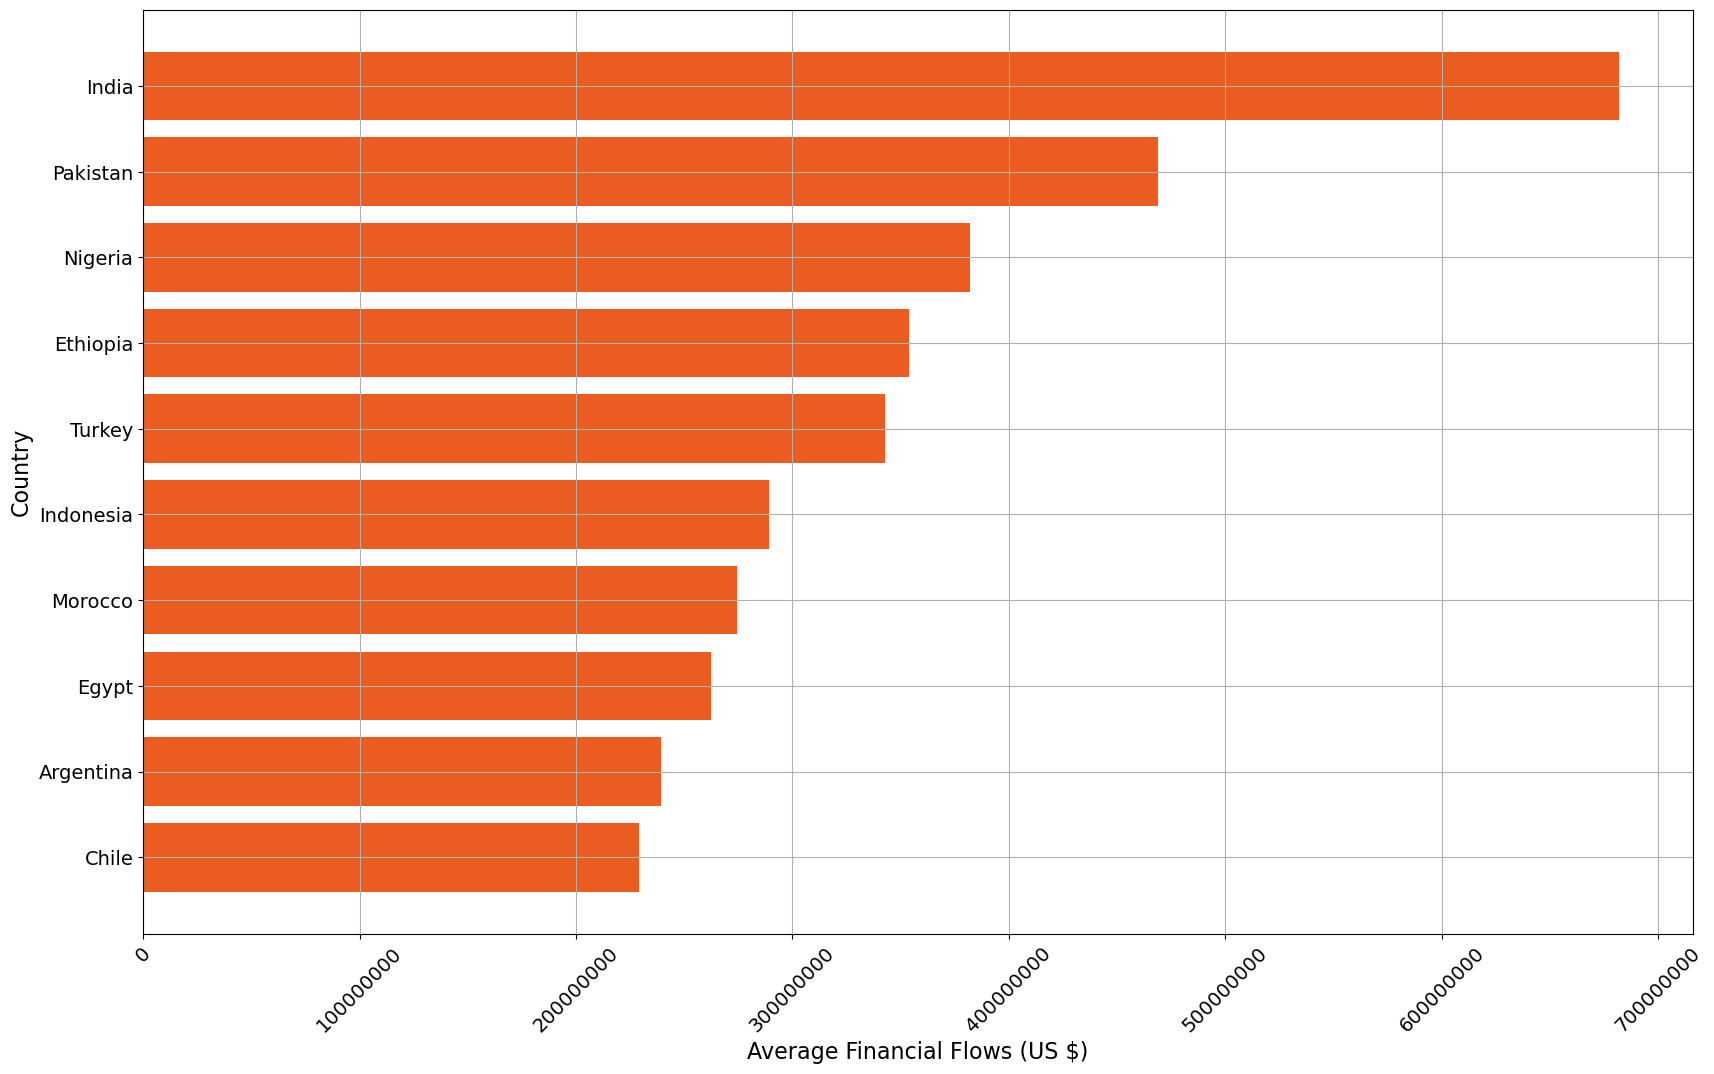

In [96]:
# Create a scatter plot for the top 10 entities with their average financial flows
top_10_entities_ff = top_10_entities_ff.sort_values(ascending=True)
plt.figure(figsize=(20, 12))
plt.barh(top_10_entities_ff.index, top_10_entities_ff.values, color='#EA5C1F')
ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.xaxis.get_major_formatter().set_scientific(False)
plt.xlabel('Average Financial Flows (US $)', fontsize=16)
plt.ylabel('Country', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.savefig('top_10_countries_with_highest_average_financial_flows.png')
plt.show()

In [83]:
data_2020_cleaned = new_data_df.dropna(subset=["Financial flows to developing countries (US $)", "Renewable energy share in the total final energy consumption (%)"])

# Calculate the average financial flows for each entity
averages = data_2020_cleaned.groupby('Entity')['Financial flows to developing countries (US $)'].mean()

# Filter entities with an average greater than $10,000
mask = averages > 10000  # 10 thousand dollars
filtered_averages = averages[mask]

# bottom_entities_over_10thousand_ff = averages[mask]

# Sort the filtered entities based on the average financial flows in ascending order
filtered_averages_sorted = filtered_averages.sort_values()

# Select the bottom 10 entities with the highest average financial flows
bottom_entities_over_10thousand_ff = filtered_averages_sorted.head(10)

# # Sort the filtered entities based on the average financial flows in descending order
# bottom_entities_over_10thousand_ff_sorted = bottom_entities_over_10thousand_ff.sort_values(ascending=False)

# # Sort the entities based on the average financial flows in descending order
# averages_sorted = averages.sort_values(ascending=False)

# # Select the top 10 entities with the highest average financial flows
# bottom_entities_over_10thousand_ff = averages_sorted.tail(10)

# Display the top 10 entities with their average financial flows
print(bottom_entities_over_10thousand_ff)

Entity
Bahamas                   34500.0
Seychelles                87500.0
New Caledonia            213500.0
Grenada                  306000.0
Turkmenistan             316000.0
Algeria                  404500.0
Sao Tome and Principe    441000.0
Saint Lucia              535500.0
Eswatini                 543000.0
Comoros                  630500.0
Name: Financial flows to developing countries (US $), dtype: float64


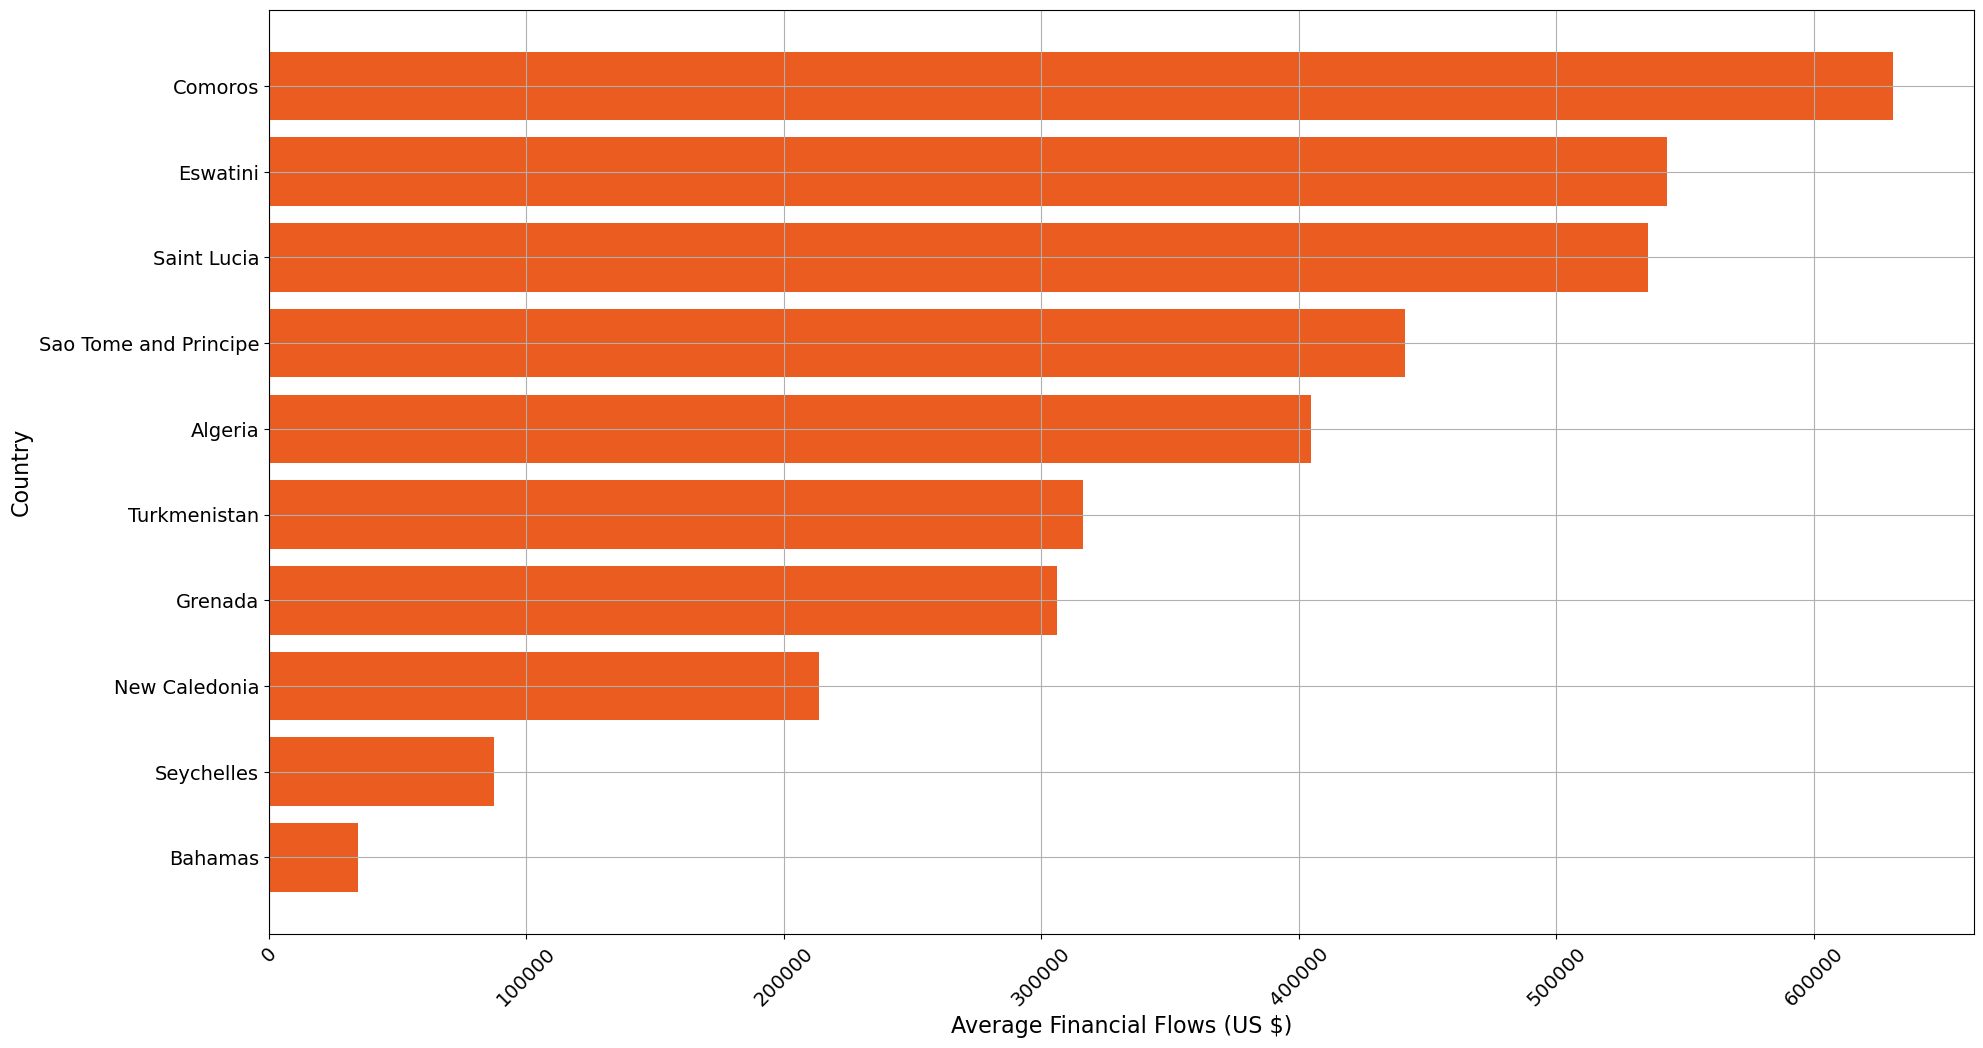

In [100]:
# Create a scatter plot for the bottom 10 entities with their average financial flows
plt.figure(figsize=(22, 12))
plt.barh(bottom_entities_over_10thousand_ff.index, bottom_entities_over_10thousand_ff.values, color='#EA5C1F')
plt.xlabel('Average Financial Flows (US $)', fontsize=16)
plt.ylabel('Country', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.savefig('top_10_countries_with_lowest_average_financial_flows.png')
plt.show()

In [85]:
data_2020_cleaned = new_data_df.dropna(subset=["Financial flows to developing countries (US $)", "Renewable energy share in the total final energy consumption (%)"])

# Calculate the average financial flows for each entity
averages = data_2020_cleaned.groupby('Entity')['Financial flows to developing countries (US $)'].mean()
averages

# # Filter entities with an average greater than $10,000
mask = averages > 10000  # 10 thousand dollars
mask



# bottom_entities_over_10thousand_re = averages[mask]

# # Sort the filtered entities based on the average financial flows in descending order
# bottom_entities_over_10thousand_re_sorted = bottom_entities_over_10thousand_re.sort_values(ascending=False)

# # Sort the entities based on the average financial flows in descending order
# averages_sorted = averages.sort_values(ascending=False)

# # Select the top 10 entities with the highest average financial flows
# bottom_entities_over_10thousand_re = averages_sorted.tail(10)

# # Display the top 10 entities with their average financial flows
# print(bottom_entities_over_10thousand_re)

Entity
Afghanistan            True
Algeria                True
Angola                 True
Antigua and Barbuda    True
Argentina              True
                       ... 
Uzbekistan             True
Vanuatu                True
Yemen                  True
Zambia                 True
Zimbabwe               True
Name: Financial flows to developing countries (US $), Length: 175, dtype: bool

In [86]:
data_2020_cleaned = new_data_df.dropna(subset=["Financial flows to developing countries (US $)", "Renewable energy share in the total final energy consumption (%)"])

# Calculate the average financial flows for each entity
averages = data_2020_cleaned.groupby('Entity')['Financial flows to developing countries (US $)'].mean()

# Filter entities with an average greater than 1 billion dollars
mask = averages > 10000  # 10 thousand dollars
bottom_entities_over_10thousand = averages[mask]

# Sort the filtered entities based on the average financial flows in descending order
bottom_entities_over_10thousand_sorted = bottom_entities_over_10thousand.sort_values(ascending=True)

# Display the top entities with an average greater than 1 billion dollars
print(bottom_entities_over_10thousand_sorted)

Entity
Bahamas              34500.0
Seychelles           87500.0
New Caledonia       213500.0
Grenada             306000.0
Turkmenistan        316000.0
                    ...     
Turkey           342547500.0
Ethiopia         354049000.0
Nigeria          381888000.0
Pakistan         469046500.0
India            682033000.0
Name: Financial flows to developing countries (US $), Length: 118, dtype: float64


In [88]:
data_2020_cleaned = new_data_df.dropna(subset=["Financial flows to developing countries (US $)", "Renewable energy share in the total final energy consumption (%)"])

# Calculate the average Renewable Energy Share in the Total Final Energy Consumption % for each entity
averages = data_2020_cleaned.groupby('Entity')['Renewable energy share in the total final energy consumption (%)'].mean()

# Sort the entities based on the average Renewable Energy Share in descending order
averages_sorted = averages.sort_values(ascending=False)

# Select the top 10 entities with the highest average financial flows
top_10_entities_re = averages_sorted.head(10)

# Display the top 10 entities with their average financial flows
print(top_10_entities_re)

Entity
Somalia                     93.8005
Uganda                      93.0705
Ethiopia                    93.0030
Burundi                     92.4315
Central African Republic    91.8745
Bhutan                      88.9885
Guinea-Bissau               88.2055
Liberia                     88.0370
Rwanda                      87.6675
Zambia                      86.8955
Name: Renewable energy share in the total final energy consumption (%), dtype: float64


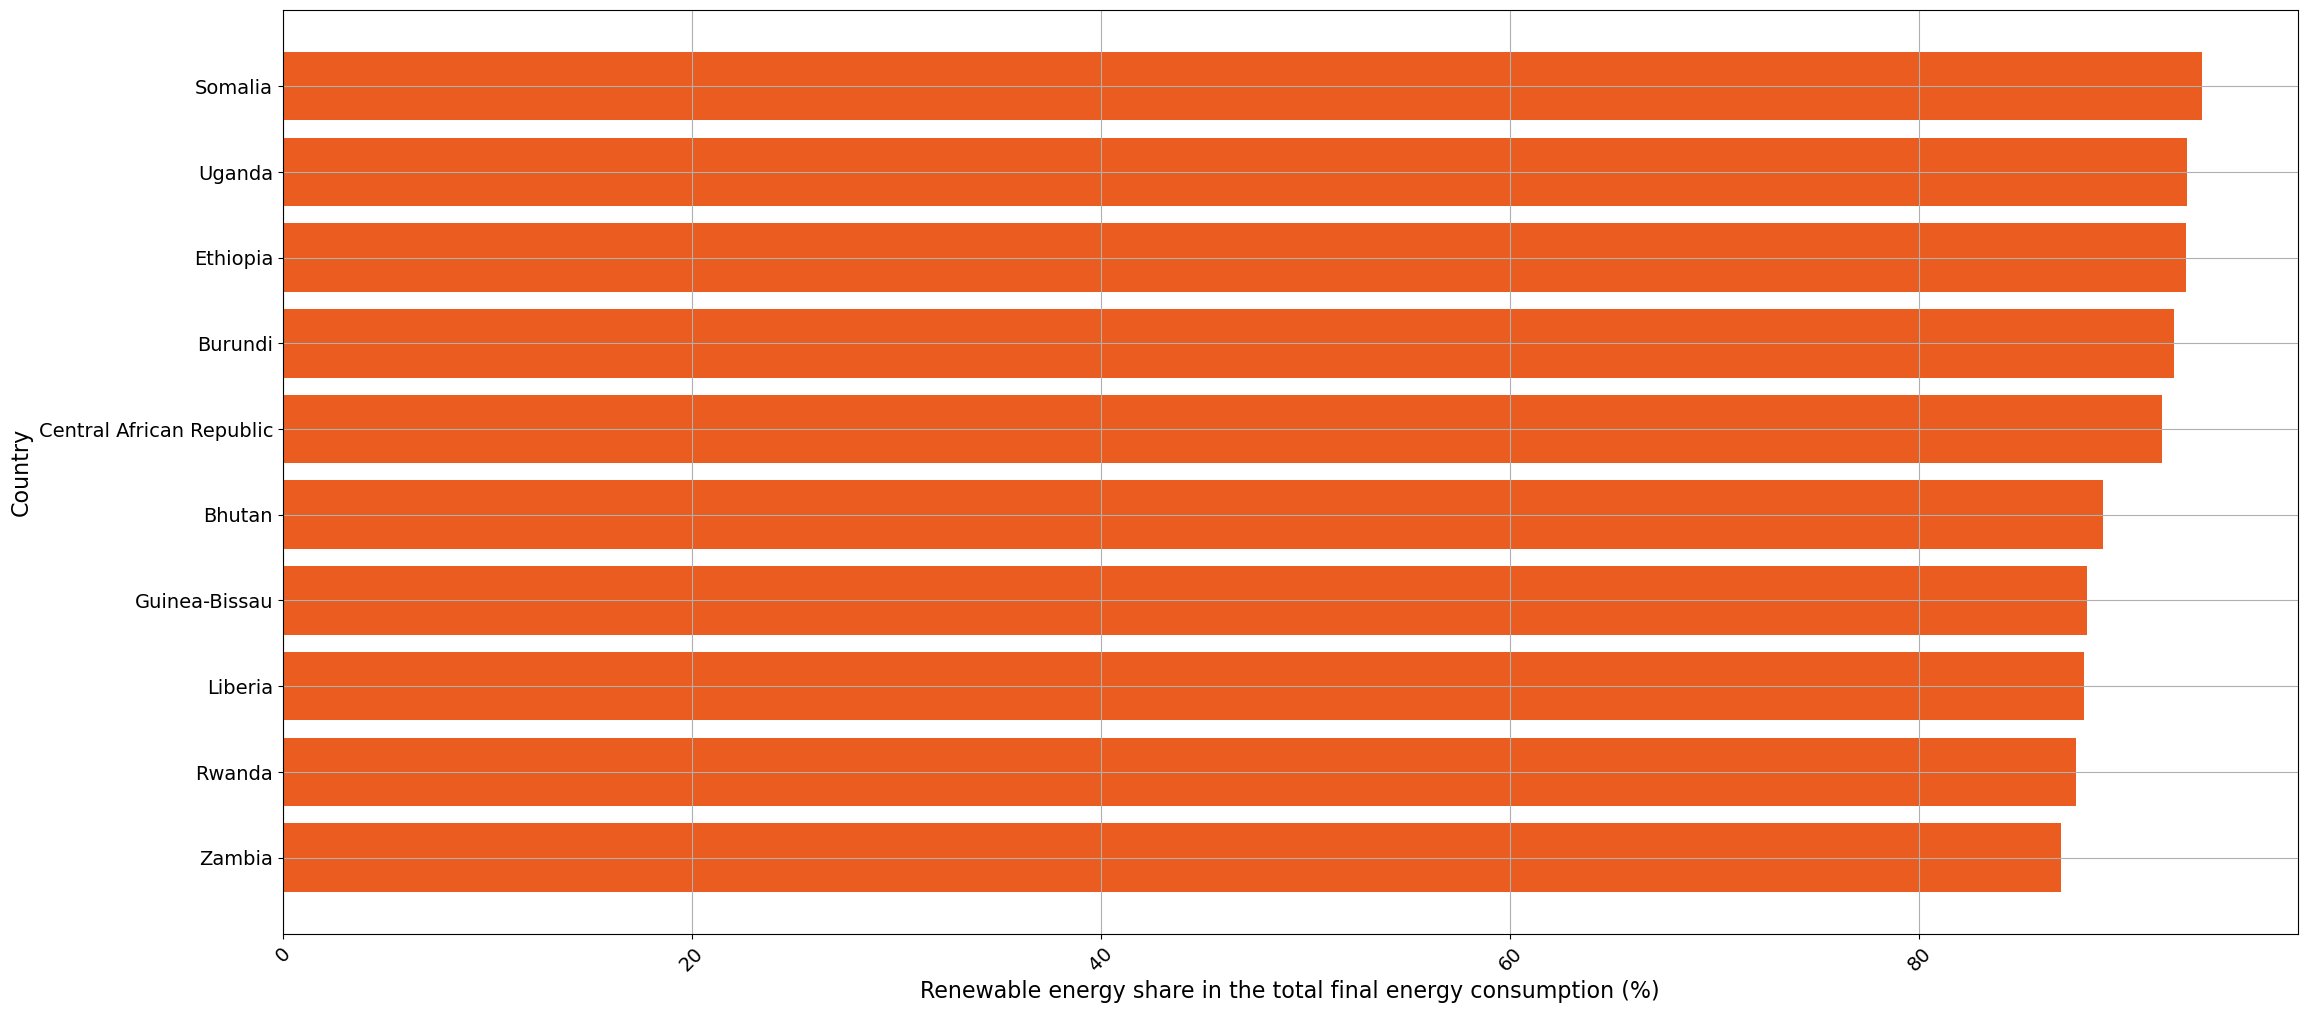

In [102]:
# Create a scatter plot for the top 10 entities with their average renewable energy share in the total final energy consumption %
top_10_entities_re = top_10_entities_re.sort_values(ascending=True)
plt.figure(figsize=(26, 12))
plt.barh(top_10_entities_re.index, top_10_entities_re.values, color='#EA5C1F')
plt.xlabel('Renewable energy share in the total final energy consumption (%)', fontsize=16)
plt.ylabel('Country', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.savefig('top_10_countries_with_highest_average_renewable_energy_share.png')
plt.show()

In [90]:
data_2020_cleaned = new_data_df.dropna(subset=["Financial flows to developing countries (US $)", "Renewable energy share in the total final energy consumption (%)"])

# Calculate the average Renewable Energy Share in the Total Final Energy Consumption % for each entity
averages = data_2020_cleaned.groupby('Entity')['Renewable energy share in the total final energy consumption (%)'].mean()

# Filter entities with an average greater than $10,000
mask = averages > 1  # 1 percent
filtered_averages = averages[mask]

# Sort the filtered entities based on the average financial flows in ascending order
filtered_averages_sorted = filtered_averages.sort_values()

# # Sort the entities based on the average Renewable Energy Share in descending order
# averages_sorted = averages.sort_values(ascending=False)

# Select the bottom 10 entities with the highest average Renewable Energy Share
bottom_entities_over_10thousand_re = filtered_averages_sorted.head(10)

# # Select the top 10 entities with the highest average financial flows
# top_10_entities_re = averages_sorted.head(10)

# Display the top 10 entities with their average financial flows
print(bottom_entities_over_10thousand_re)

Entity
Iraq          1.0450
Seychelles    1.1165
Uzbekistan    1.2385
Yemen         1.3115
Bahamas       1.4005
Maldives      1.5390
Kazakhstan    1.8170
Tonga         1.8935
Tuvalu        2.0530
Malta         2.6295
Name: Renewable energy share in the total final energy consumption (%), dtype: float64


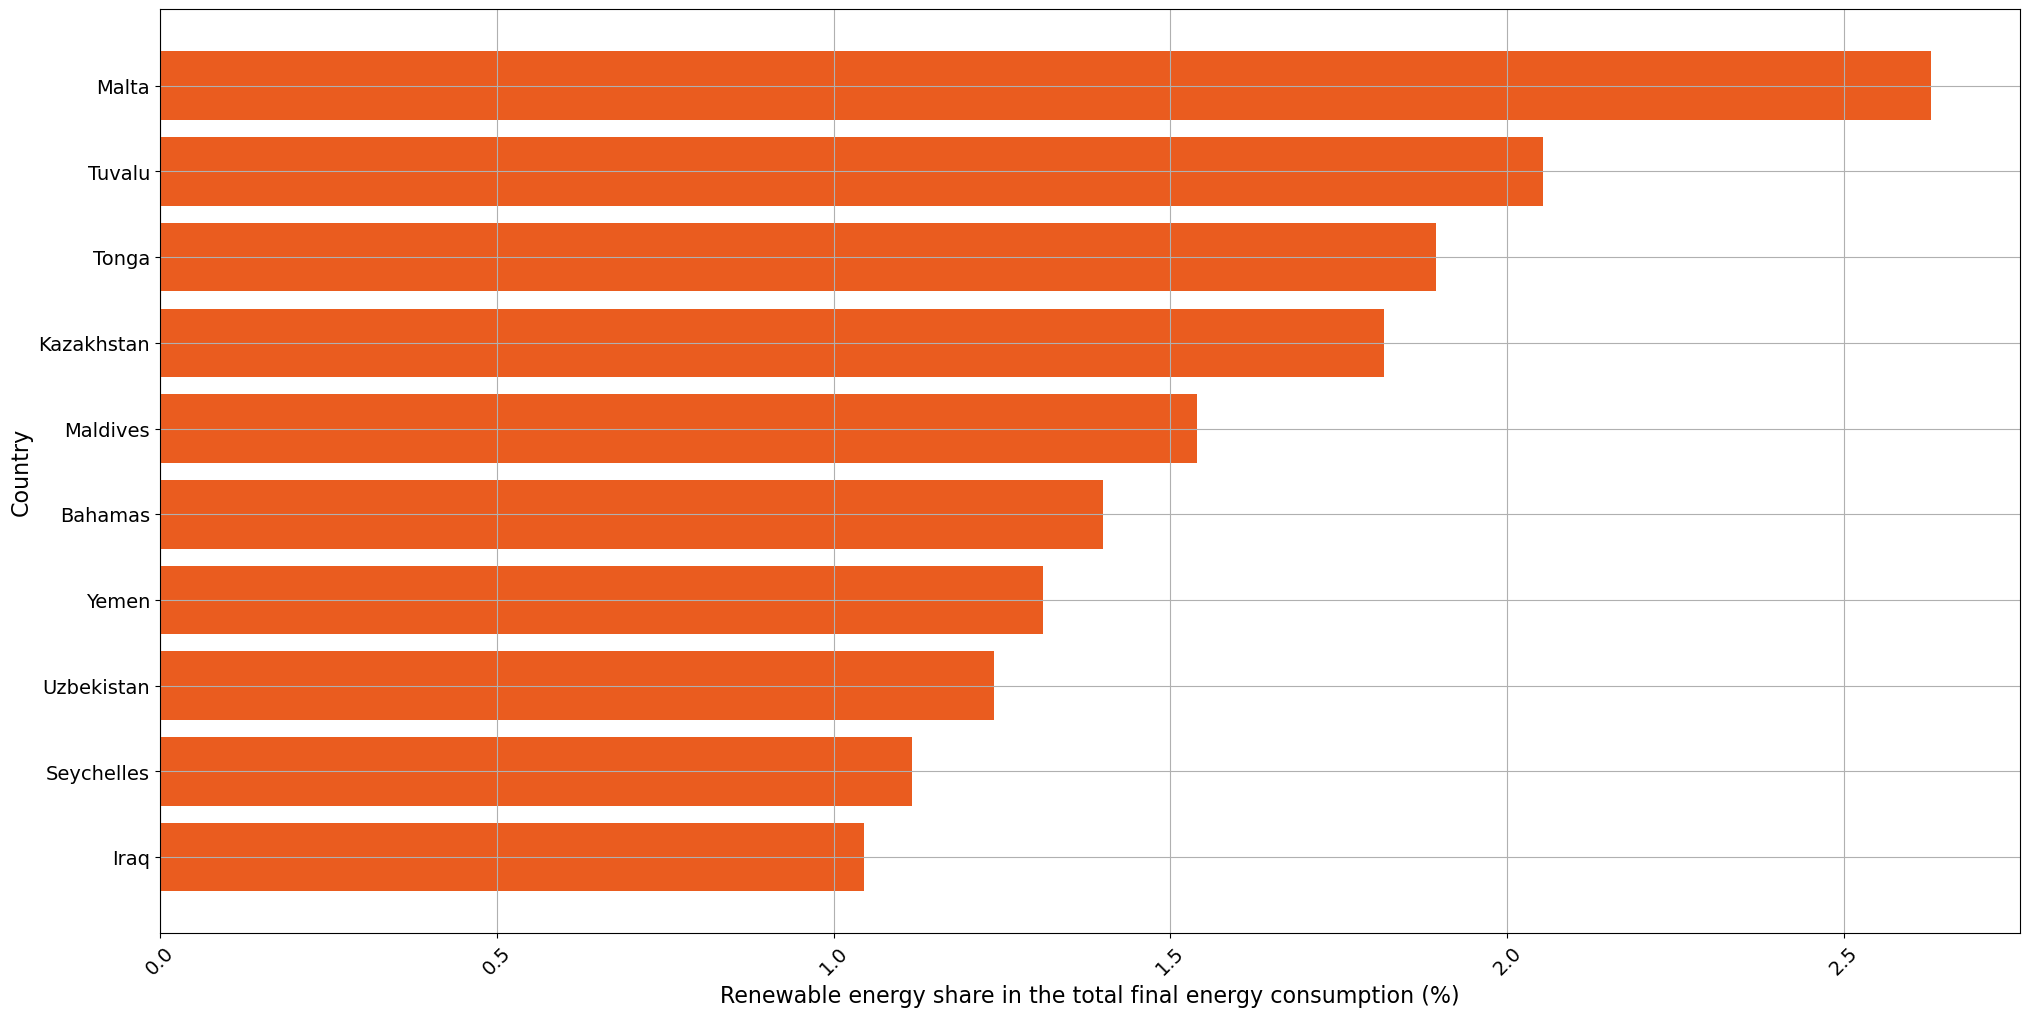

In [103]:
# Create a scatter plot for the top 10 entities with their average renewable energy share in the total final energy consumption %
plt.figure(figsize=(24, 12))
plt.barh(bottom_entities_over_10thousand_re.index, bottom_entities_over_10thousand_re.values, color='#EA5C1F')
plt.xlabel('Renewable energy share in the total final energy consumption (%)', fontsize=16)
plt.ylabel('Country', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.savefig('top_10_countries_with_lowest_average_renewable_energy_share.png')
plt.show()

In [92]:
data_2020_cleaned = new_data_df.dropna(subset=["Financial flows to developing countries (US $)", "Renewable energy share in the total final energy consumption (%)"])

# Calculate the average financial flows for each entity
averages = data_2020_cleaned.groupby('Entity')['Financial flows to developing countries (US $)'].mean()

# Sort the entities based on the average financial flows in descending order
averages_sorted = averages.sort_values(ascending=False)

# Select the top 10 entities with the highest average financial flows
bottom_10_entities = averages_sorted.tail(10)

# Display the top 10 entities with their average financial flows
print(bottom_10_entities)

Entity
Oman              0.0
Norway            0.0
Germany           0.0
Canada            0.0
Cayman Islands    0.0
New Zealand       0.0
Netherlands       0.0
Croatia           0.0
Montenegro        0.0
Latvia            0.0
Name: Financial flows to developing countries (US $), dtype: float64


In [70]:
# Calculate the average financial flows for each entity
averages = new_data_df.groupby('Entity')['Financial flows to developing countries (US $)'].mean()

# Filter entities with an average greater than 1 billion dollars
mask = averages > 10000  # 10 thousand dollars
top_entities_over_10thousand = averages[mask]

# Sort the filtered entities based on the average financial flows in descending order
top_entities_over_10thousand_sorted = top_entities_over_10thousand.sort_values(ascending=False)

# Display the top entities with an average greater than 1 billion dollars
print(top_entities_over_10thousand_sorted)

Entity
India            6.495552e+08
Pakistan         4.467110e+08
Nigeria          3.637029e+08
Ethiopia         3.371895e+08
Turkey           3.262357e+08
                     ...     
Turkmenistan     3.009524e+05
Grenada          2.914286e+05
New Caledonia    2.033333e+05
Seychelles       8.333333e+04
Bahamas          3.285714e+04
Name: Financial flows to developing countries (US $), Length: 118, dtype: float64


In [71]:
# Calculate the average financial flows for each entity
averages = new_data_df.groupby('Entity')['Financial flows to developing countries (US $)'].mean()

# Filter entities with an average greater than 1 billion dollars
mask = averages > 10000  # 10 thousand dollars
bottom_entities_over_10thousand = averages[mask]

# Sort the filtered entities based on the average financial flows in descending order
bottom_entities_over_10thousand_sorted = bottom_entities_over_10thousand.sort_values(ascending=True)

# Display the top entities with an average greater than 1 billion dollars
print(bottom_entities_over_10thousand_sorted)

Entity
Bahamas          3.285714e+04
Seychelles       8.333333e+04
New Caledonia    2.033333e+05
Grenada          2.914286e+05
Turkmenistan     3.009524e+05
                     ...     
Turkey           3.262357e+08
Ethiopia         3.371895e+08
Nigeria          3.637029e+08
Pakistan         4.467110e+08
India            6.495552e+08
Name: Financial flows to developing countries (US $), Length: 118, dtype: float64


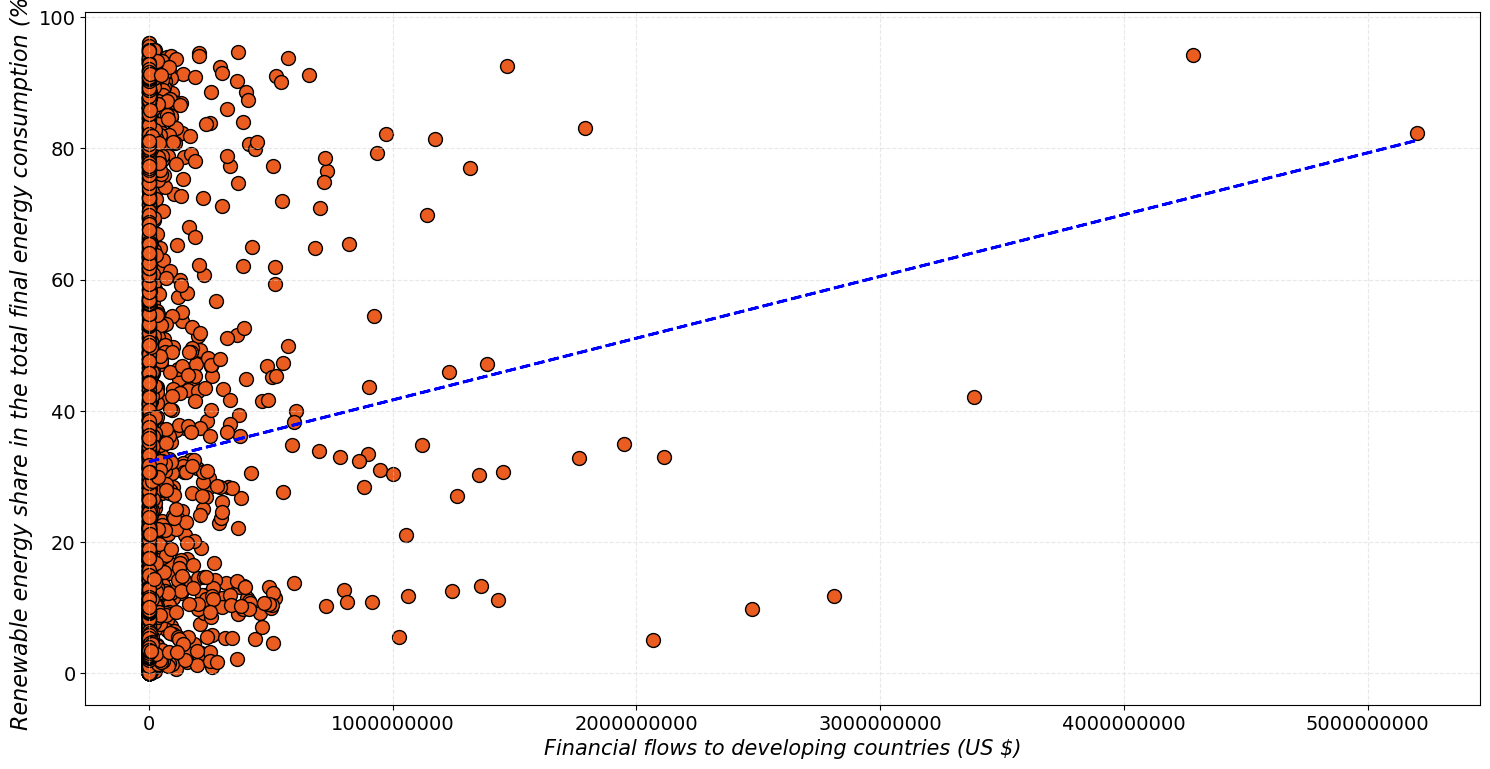

In [104]:
data_2020_cleaned = new_data_df.dropna(subset=["Financial flows to developing countries (US $)", "Renewable energy share in the total final energy consumption (%)"])

# Data
x_values = data_2020_cleaned["Financial flows to developing countries (US $)"]
y_values = data_2020_cleaned["Renewable energy share in the total final energy consumption (%)"]

# Calculate the line of best fit
coefficients = np.polyfit(x_values, y_values, 1)  # 1 is the degree of the polynomial
trendline = np.poly1d(coefficients)

# Create scatter plot
plt.figure(figsize=(18, 9))
plt.scatter(x_values, y_values, facecolor="#EA5C1F", edgecolor="black", s=100)

# Plot the trend line
plt.plot(x_values, trendline(x_values), color="blue", linestyle="--", linewidth=2)

# Scientific Notation Removal
ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.xaxis.get_major_formatter().set_scientific(False)

# Add labels and title
plt.xlabel("Financial flows to developing countries (US $)", fontsize=15, fontstyle="italic")
plt.ylabel("Renewable energy share in the total final energy consumption (%)", fontsize=16, fontstyle="italic")
# plt.title("Financial Flows vs Renewable Energy Share in the Total Final Energy Consumption", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle="--", alpha=0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('financial_flows_vs_renewable_energy_share_in_the_total_final_energy_consumption.png')

# Display the plot
plt.show()